# Directed Null Model Generation

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
G = nx.read_edgelist('largest_component_networkx_format.csv', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

## Basic Features of this Network

In [3]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

in_degree = [G.in_degree(node) for node in G]
out_degree = [G.out_degree(node) for node in G]

kmin_in = min(in_degree)
kmax_in = max(in_degree)

kmin_out = min(out_degree)
kmax_out = max(out_degree)


In [4]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

print("Average in-degree ", np.mean(in_degree))
print()
print("Minimum in-degree: ", kmin_in)
print("Maximum in-degree: ", kmax_in)

print("Average out-degree ", np.mean(out_degree))
print()
print("Minimum out-degree: ", kmin_out)
print("Maximum out-degree: ", kmax_out)




Number of nodes:  8932
Number of edges:  14001

Average degree:  3.1350201522615317
Average degree (alternate calculation) 3.1350201522615317

Minimum degree:  1
Maximum degree:  381
Average in-degree  1.5675100761307659

Minimum in-degree:  0
Maximum in-degree:  378
Average out-degree  1.5675100761307659

Minimum out-degree:  0
Maximum out-degree:  105


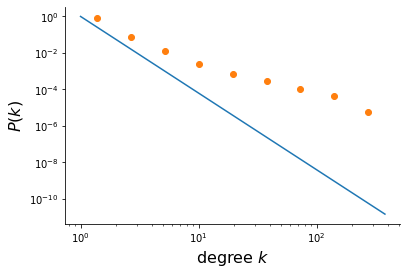

In [5]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

x1 = np.logspace(0, 2.58) #log of largest degree
y1 = x1 ** -4.2 #alpha value from power law
plt.plot(x1, y1)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

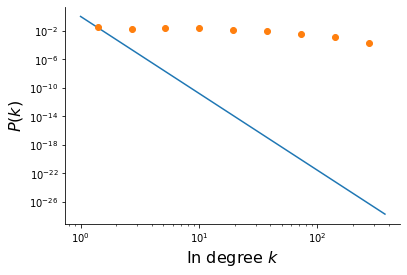

In [6]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
in_density, _ = np.histogram(in_degree, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

x1 = np.logspace(0, 2.57)#log of max degree
y1 = x1 ** -10.8 #alpha value identified from power law
plt.plot(x1, y1)


plt.loglog(x, in_density, marker='o', linestyle='none')
plt.xlabel(r"In degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

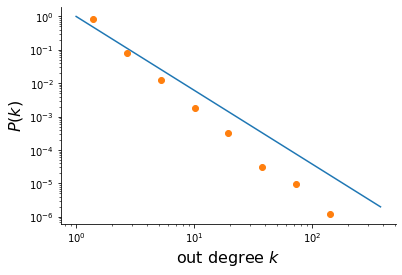

In [7]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
out_density, _ = np.histogram(out_degree, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

x1 = np.logspace(0, 2.58) # log of maximum degree
y1 = x1 ** -2.21 #alpha value found from power law
plt.plot(x1, y1)

plt.loglog(x, out_density, marker='o', linestyle='none')
plt.xlabel(r"out degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [8]:
#Persist the Centrality measures to speperate files
def persist_first_to_csv(centrality_dict, filename,columnname):
    curr = pd.DataFrame.from_dict(centrality_dict, orient="index", columns = [columnname])
    curr.to_csv(filename)
    
    
groupname = "RealNetwork"

clustering_filename = "{}_avg_clustering.csv".format(groupname)

apl_filename = "{}_apl.csv".format(groupname)

deg_cen_pd = "{}_deg_cen_df.csv".format(groupname)
in_deg_cen_pd = "{}_out_deg_cen_df.csv".format(groupname)
out_deg_cen_pd = "{}_in_deg_cen_df.csv".format(groupname)
eigenvector_cen_pd = "{}_eigenvector_cen_df.csv".format(groupname)
betweenness_cen_pd = "{}_betweenness_cen_df.csv".format(groupname)    
clustering_pd = "{}_clustering_df.csv".format(groupname)

filename = "RealNetwork"
G = nx.read_edgelist("largest_component_networkx_format.csv", comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')
print(nx.average_shortest_path_length(G))
print(nx.average_clustering(G))

persist_first_to_csv(nx.clustering(G),clustering_pd,filename)
persist_first_to_csv(nx.degree_centrality(G),deg_cen_pd,filename)
persist_first_to_csv(nx.in_degree_centrality(G),in_deg_cen_pd,filename)
persist_first_to_csv(nx.out_degree_centrality(G),out_deg_cen_pd,filename)
persist_first_to_csv(nx.eigenvector_centrality(G),eigenvector_cen_pd,filename)
persist_first_to_csv(nx.betweenness_centrality(G,k=None, normalized=True),betweenness_cen_pd,filename)

0.0012293584044826328
0.009608690028807564


x max: None
alpha=  4.162557244292607   sigma=  0.03346293563464452


<AxesSubplot:>

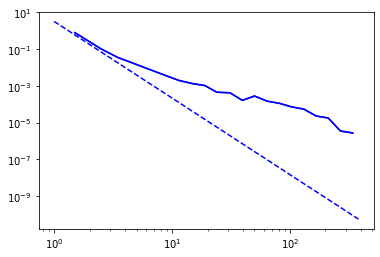

In [10]:
#plotting the degree along a power law distribution obtaining the alpha value and sigma value
import powerlaw
nodes = G.nodes()
degree = dict(G.degree())
degseq=[degree.get(k,0) for k in nodes]
data = np.array(degseq)
fit = powerlaw.Fit(degseq,xmin=1)
fit.plot_pdf( color= 'b')
fit.power_law.plot_pdf( color= 'b',linestyle='--')
print("x max: {}".format(fit.xmax))

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

R, p = fit.distribution_compare('power_law', 'exponential')


powerlaw.plot_pdf(degseq, color='b')

x max: None
alpha=  10.81103324588881   sigma=  0.10381028663086521


<AxesSubplot:>

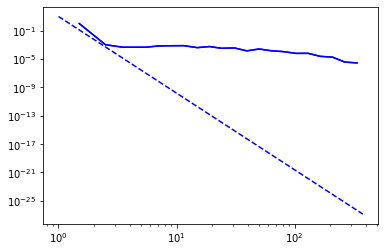

In [11]:
#plot the in-degree against a power law 
import powerlaw
nodes = G.nodes()
degree = dict(G.in_degree())
degseq=[degree.get(k,0) for k in nodes]
for i in range(len(degseq)):
    degseq[i] = degseq[i] +1

data = np.array(degseq)
fit = powerlaw.Fit(degseq,xmin=1)
fit.plot_pdf( color= 'b')
fit.power_law.plot_pdf( color= 'b',linestyle='--')
print("x max: {}".format(fit.xmax))

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

R, p = fit.distribution_compare('power_law', 'exponential')


powerlaw.plot_pdf(degseq, color='b')

x max: None
alpha=  2.214141883665169   sigma=  0.01284680357256311


<AxesSubplot:>

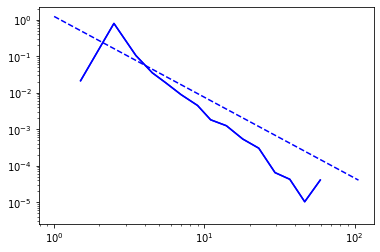

In [12]:
#plot the out-degree against a power law 
import powerlaw
nodes = G.nodes()
degree = dict(G.out_degree())
degseq=[degree.get(k,0) for k in nodes]
for i in range(len(degseq)):
    degseq[i] = degseq[i] +1

data = np.array(degseq)
fit = powerlaw.Fit(degseq,xmin=1)
fit.plot_pdf( color= 'b')
fit.power_law.plot_pdf( color= 'b',linestyle='--')
print("x max: {}".format(fit.xmax))

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

R, p = fit.distribution_compare('power_law', 'exponential')


powerlaw.plot_pdf(degseq, color='b')



# Shortest Path of Real Network

In [16]:
print(nx.average_shortest_path_length(G))

0.0012293584044826328


# Average Clustering Real Network

In [17]:
print(nx.average_clustering(G))

0.009608690028807564


In [19]:
degree = dict(G.out_degree())
degree = pd.DataFrame.from_dict(degree, orient="index", columns = ["degree"])
degree

,degree
1385933370090209280,1
158095776,0
1416535505454338050,2
1604931252,0
544695802,1
...,...
77596220,1
891058415195303939,1
1095768409449459712,1
881426857,1


In [27]:
random_df

,degree,filename_x,Directed_Unweighted_Random_Null_Model_1,Directed_Unweighted_Random_Null_Model_10,Directed_Unweighted_Random_Null_Model_11,Directed_Unweighted_Random_Null_Model_12,Directed_Unweighted_Random_Null_Model_13,Directed_Unweighted_Random_Null_Model_14,Directed_Unweighted_Random_Null_Model_15,Directed_Unweighted_Random_Null_Model_16,...,Directed_Unweighted_Random_Null_Model_591,Directed_Unweighted_Random_Null_Model_592,Directed_Unweighted_Random_Null_Model_593,Directed_Unweighted_Random_Null_Model_594,Directed_Unweighted_Random_Null_Model_595,Directed_Unweighted_Random_Null_Model_596,Directed_Unweighted_Random_Null_Model_597,Directed_Unweighted_Random_Null_Model_598,Directed_Unweighted_Random_Null_Model_599,average_node_clustering
1385933370090209280,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001014
158095776,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.006536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000394
1416535505454338050,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010649
1604931252,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001350,0.002699,...,0.002024,0.000675,0.000000,0.000000,0.000000,0.000000,0.001350,0.000675,0.000000,0.000359
544695802,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261772246,3,0.001894,0.000947,0.007576,0.005682,0.005682,0.000947,0.002841,0.005682,0.001894,...,0.002841,0.006629,0.005682,0.001894,0.006629,0.001894,0.004735,0.000947,0.004735,0.007041
216469057,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000338
2375818352,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000676
165812196,0,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000406


In [29]:


#obtaining real clustering data 
real = pd.read_csv('RealNetwork_clustering_df.csv')
real = real.set_index("Unnamed: 0")

#merging all null model clustering coefficients indexed by node
real = pd.merge(real, degree, left_index=True, right_index=True)
all_files = ['done_1_group_clustering_df.csv', 'Group1_5_2_clustering_df.csv', 'Group1_5_3_clustering_df.csv', 'Group1_5_clustering_df.csv','Group1_clustering_df.csv', 'Group2_clustering_df.csv',
                         'Group3_clustering_df.csv', 'Group4_clustering_df.csv', 'Group5_clustering_df.csv','Group2_1_clustering_df.csv']
all_dfs = []
for file in all_files:
    all_dfs.append(pd.read_csv('Directed_Unweighted_Model_Stats/'+file))

for df in all_dfs:
    df = df.set_index("Unnamed: 0")
    real = pd.merge(real, df, left_index=True, right_index=True)
    
#drop the real data from average     
random_df = real.drop('RealNetwork',axis = 1)

#take the average of averages 

random_df['average_node_clustering'] = random_df.mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = random_df['degree'], y = random_df ['average_node_clustering'],  label = "Random", alpha = 0.5)
ax.scatter(x = real['degree'], y = real['RealNetwork'], label = "Real Data", alpha = 0.5)

plt.xlabel("Degree K")
plt.ylabel("Clustering Coefficient")
plt.legend(loc="upper right")

# Calculating average and variance of APL & Avg Clustering

In [30]:
nx.average_clustering(G)

0.009608690028807564

In [31]:
nx.average_shortest_path_length(G)

0.0012293584044826328

In [32]:
import numpy
all_files = ['done_1_group_avg_clustering.csv', 'Group1_5_2_avg_clustering.csv', 'Group1_5_3_avg_clustering.csv', 'Group1_5_avg_clustering.csv','Group1_avg_clustering.csv', 'Group2_avg_clustering.csv',
                         'Group3_avg_clustering.csv', 'Group4_avg_clustering.csv', 'Group5_avg_clustering.csv','Group2_1_avg_clustering.csv']
#collect the average clustering coefficient from all groups
clustering_vals = []
for file in all_files:
    f = open(file, "r")
    clustering_vals.extend(f.readlines())
#change them to floats
for i in range(len(clustering_vals)):
    clustering_vals[i] = float(clustering_vals[i])
#average    
arr = numpy.array(clustering_vals)

print("Mean: {}".format(arr.mean()))
print("Variance: {}".format(arr.std()))

# there was an error here just because of polishing we moved the file and it reran

FileNotFoundError: [Errno 2] No such file or directory: 'done_1_group_avg_clustering.csv'

In [ ]:
import numpy
all_files = ['done_1_group_apl.csv', 'Group1_5_2_apl.csv', 'Group1_5_3_apl.csv', 'Group1_5_apl.csv','Group1_apl.csv', 'Group2_apl.csv',
                         'Group3_apl.csv', 'Group4_apl.csv', 'Group5_apl.csv','Group2_1_apl.csv']
#collect the average APL from all groups

vals = []
for file in all_files:
    f = open(file, "r")
    vals.extend(f.readlines())
#change them to floats

for i in range(len(vals)):
    vals[i] = float(vals[i])
    
arr = numpy.array(vals)

print("Mean: {}".format(arr.mean()))
print("Variance: {}".format(arr.std()))